## HW 1.

In [1]:
import sys
from pathlib import Path
current = Path(Path().resolve())
sys.path.append(str(current))
sys.path.append(str(current.parents[2]))

from contract import *
from market_data import *
from pricer import *
from model import *

QuantCourseBP ebf2e30ad112b8a2583ca7f6c05bb381f5319054*


In [2]:
digital = EuropeanDigitalContract(underlying=Stock.TIPTOP_SOLUTIONS, derivative_type=PutCallFwd.CALL,\
                                  long_short=LongShort.LONG, strike=100, expiry=1)
digital_pricer = EuropeanDigitalAnalyticPricer(contract=digital, model=MarketModel(Stock.TIPTOP_SOLUTIONS),\
                                              params=Params())

In [3]:
spot_timeline = {
    0: MarketData.get_spot()[Stock.TIPTOP_SOLUTIONS],
    0.25: 180,
    0.5: 200,
    0.75: 150,
    1.: 50,
    2.: 10
}

print('Time to maturity: ',digital.get_timeline())
print('Payoff at maturity: ',digital.payoff(spot_timeline))

Time to maturity:  [1]
Payoff at maturity:  0.0


In [4]:
print('Fair value: ',digital_pricer.calc_fair_value())
print('Delta: ',digital_pricer.calc_delta())
print('Gamma: ',digital_pricer.calc_gamma())
print('Vega: ',digital_pricer.calc_vega())
print('Theta: ',digital_pricer.calc_theta())
print('Rho: ',digital_pricer.calc_rho())

Fair value:  0.9160025649229482
Delta:  0.0005412311024857114
Gamma:  -2.0089809963705203e-05
Vega:  -0.20213487591108772
Theta:  0.07334315343728312
Rho:  -0.8200314658301819


In [5]:
!pytest test_pricer.py

============================= test session starts ==============================
platform darwin -- Python 3.9.6, pytest-7.4.2, pluggy-1.5.0
rootdir: /Users/tarkanyiandras/Documents/Git/QuantCourseBP/homeworks/SHV93FP/Library_building_blocks
plugins: anyio-4.8.0
collected 48 items                                                             

test_pricer.py ................................................          [100%]

============================== 48 passed in 0.70s ==============================


## HW 2.

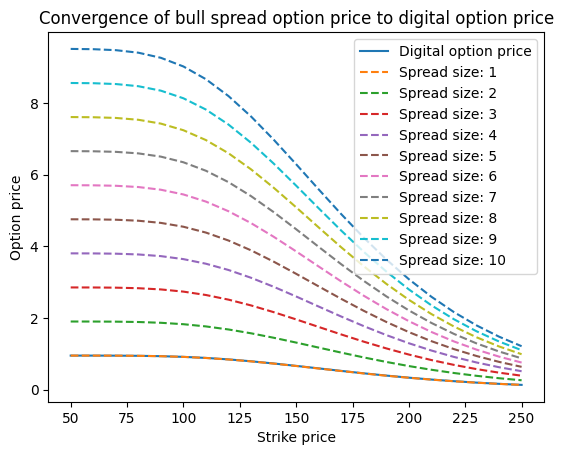

In [40]:
import matplotlib.pyplot as plt

def bull_spread(strike_long, strike_short):
    call_long = EuropeanContract(underlying=Stock.TIPTOP_SOLUTIONS, derivative_type=PutCallFwd.CALL,\
                                  long_short=LongShort.LONG, strike=strike_long, expiry=1)
    call_long_pricer = EuropeanAnalyticPricer(contract=call_long, model=MarketModel(Stock.TIPTOP_SOLUTIONS),\
                                              params=Params())
    call_short = EuropeanContract(underlying=Stock.TIPTOP_SOLUTIONS, derivative_type=PutCallFwd.CALL,\
                                  long_short=LongShort.SHORT, strike=strike_short, expiry=1)
    call_short_pricer = EuropeanAnalyticPricer(contract=call_short, model=MarketModel(Stock.TIPTOP_SOLUTIONS),\
                                              params=Params())
    return call_long_pricer.calc_fair_value()+call_short_pricer.calc_fair_value()

def digital_price(strike_long):
    digital = EuropeanDigitalContract(underlying=Stock.TIPTOP_SOLUTIONS, derivative_type=PutCallFwd.CALL,\
                                  long_short=LongShort.LONG, strike=strike_long, expiry=1)
    digital_pricer = EuropeanDigitalAnalyticPricer(contract=digital, model=MarketModel(Stock.TIPTOP_SOLUTIONS),\
                                              params=Params())
    return digital_pricer.calc_fair_value()

strike_long=np.arange(50,251,10)
spreadarr = np.arange(1,11,1)

bull_price=[]
dig_price=digital_price(strike_long)

for i in range(len(spreadarr)):
    bull_price.append([bull_spread(strike_long,strike_long+spreadarr[i])])

    
plt.figure()
plt.title('Convergence of bull spread option price to digital option price')
plt.plot(strike_long, dig_price, label='Digital option price')
for i in range(len(bull_price)):
    plt.plot(strike_long, bull_price[i][0], '--', label=f'Spread size: {spreadarr[i]}')
plt.legend()
plt.xlabel('Strike price')
plt.ylabel('Option price')
plt.show()